# SMAI Assignment - 2

## Question - `2` : Face Recognition using Principal Component Analysis

| | |
|- | -|
| Course | Statistical Methods in AI |
| Release Date | `16.02.2023` |
| Due Date | `24.02.2023` |

### <b>Objective:</b>
This question requires you to create a basic facial recognition system using a technique called principal component analysis (PCA) 
by projecting the face images on the feature space (face space) which best
represents the variations among distinct faces. The face space is defined as the
“Eigenfaces", which are the eigenvectors of the set of faces.

The goal of implementing this system is to recognize a person's face by comparing it to a pre-existing database of faces, and identifying the closest match.

Link to paper on Eigenfaces: [https://sites.cs.ucsb.edu/~mturk/Papers/mturk-CVPR91.pdf](https://sites.cs.ucsb.edu/~mturk/Papers/mturk-CVPR91.pdf)

### <b>About the dataset:</b>  
The AT&T face dataset contains a set of grayscale face images with dimensions 92x112. The images are organised in 40 directories (one for each subject), which have names of the form sX, where X indicates the subject number (between 1 and 40). In each of these directories, there are ten different images of that subject, which have names of the form Y.pgm, where Y is the image number for that subject (between 1 and 10). These 10 images per person are taken at different times, varying the lighting, facial expressions (open / closed eyes, smiling / not smiling) and facial details (glasses / no glasses). All the images were taken against a dark homogeneous background with the subjects in an upright, frontal position (with tolerance for some side movement). <b>Link:</b> [https://git-disl.github.io/GTDLBench/datasets/att_face_dataset/](https://git-disl.github.io/GTDLBench/datasets/att_face_dataset/)



### Tasks
1. Load dataset and divide the date into training and test sets. 
2. Implement the PCA algorithm from scratch.
3. Implement image reconstruction using the eigen projections and visualise differences for different number of components.
4. Visualise the mean(Eigen face) generated.
5. Given training set, obtain accuracy by attempting a face regonition module and obtaining the accuracy for different number of principal components.


#### Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os, sys
import random
from PIL import Image

In [2]:
from sklearn.model_selection import train_test_split

#### Import Dataset
Assign labels for the images based on the subdirectories to obtain X(images array) and y (labels).

Ensure that the test data contains atleast one image from each category.

In [3]:
#Importing the dataset from the folder
path = '/home2/harshit.g/SMAI_Assignment_2/Q2/ATnT' 
subfolders = [f.path for f in os.scandir(path) if f.is_dir()]
print(subfolders)

#Loading the images and labels into NumPy arrays
images = []
labels = []
test_images = []
test_labels = []
for i, subfolder in enumerate(subfolders):
    subfolder_images = []
    for image_file in os.listdir(subfolder):
        image_path = os.path.join(subfolder, image_file)
        with Image.open(image_path) as img: #using Pillow
            #Converting the image to grayscale 
            #Flattening it into a 1D array
            img_array = np.array(img.convert("L")).flatten()
            subfolder_images.append(img_array)
            labels.append(i)
    train_images, test_image = train_test_split(subfolder_images, test_size=0.2, random_state=42)
    images.extend(train_images)
    #Ensuring the test set has images from every subdirec of the train images
    test_images.append(test_image[0])
    test_labels.append(i)

#Converting to NumPy Arrays
images = np.array(images)
labels = np.array(labels)
test_images = np.array(test_images)
test_labels = np.array(test_labels)

['/home2/harshit.g/SMAI_Assignment_2/Q2/ATnT/s27', '/home2/harshit.g/SMAI_Assignment_2/Q2/ATnT/s35', '/home2/harshit.g/SMAI_Assignment_2/Q2/ATnT/s30', '/home2/harshit.g/SMAI_Assignment_2/Q2/ATnT/s1', '/home2/harshit.g/SMAI_Assignment_2/Q2/ATnT/s17', '/home2/harshit.g/SMAI_Assignment_2/Q2/ATnT/s7', '/home2/harshit.g/SMAI_Assignment_2/Q2/ATnT/s28', '/home2/harshit.g/SMAI_Assignment_2/Q2/ATnT/s25', '/home2/harshit.g/SMAI_Assignment_2/Q2/ATnT/s6', '/home2/harshit.g/SMAI_Assignment_2/Q2/ATnT/s10', '/home2/harshit.g/SMAI_Assignment_2/Q2/ATnT/s38', '/home2/harshit.g/SMAI_Assignment_2/Q2/ATnT/s29', '/home2/harshit.g/SMAI_Assignment_2/Q2/ATnT/s12', '/home2/harshit.g/SMAI_Assignment_2/Q2/ATnT/s5', '/home2/harshit.g/SMAI_Assignment_2/Q2/ATnT/s18', '/home2/harshit.g/SMAI_Assignment_2/Q2/ATnT/s23', '/home2/harshit.g/SMAI_Assignment_2/Q2/ATnT/s31', '/home2/harshit.g/SMAI_Assignment_2/Q2/ATnT/s24', '/home2/harshit.g/SMAI_Assignment_2/Q2/ATnT/s21', '/home2/harshit.g/SMAI_Assignment_2/Q2/ATnT/s22', '/h

In [4]:
print("Training images shape:", images.shape) #(no of images, no of pixels)
print("Test images shape:", test_images.shape)

Training images shape: (320, 10304)
Test images shape: (40, 10304)


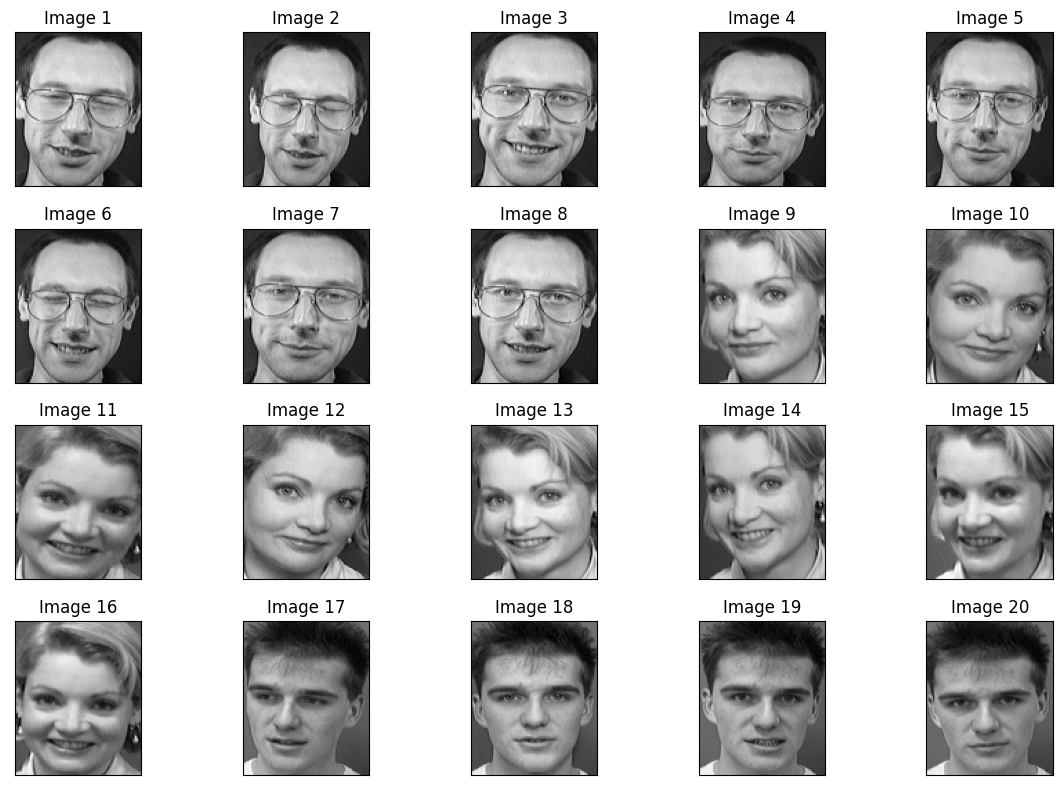

In [5]:
%matplotlib inline
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(12, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i].reshape((112, 92)), cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f"Image {i+1}")
plt.tight_layout()
plt.show()

#### Implement PCA Algorithm.

Explain your steps with comments and write a brief explanation of the method.

In [6]:
"""
Implement pca in the following function by taking the following arguements:
1. X(images array)
2. number of components
The function must return the eigen vectors (principal components) also termed "Eigen faces"
"""
def principalComponentAnalysis(X, number_of_components):
  mean_face = np.mean(X, axis=0)
  X = X - mean_face
  #Generating Covariance Matrix: Square matrix denoting the covariance of the elements with each other.
  cov_matrix = np.cov(X.T)  
  eigen_values, eigen_vectors = np.linalg.eig(cov_matrix) #Higher EV means higher variability
  #sorting in decending order
  #Reason: Automatically arranges the principal component in descending order of their variability.
  idx = eigen_values.argsort()[::-1] 
  eigen_values = eigen_values[idx]
  eigen_vectors = eigen_vectors[:,idx]
  eigen_faces = eigen_vectors[:, :number_of_components]
  return eigen_faces, mean_face

eigen_faces, mean_face = principalComponentAnalysis(images, 500)
print(eigen_faces.shape)

(10304, 500)


#### Implement Image Reconstruction from Eigenfaces


Explain your steps with comments and write a brief explanation of the method.

In [8]:
def imageReconstruction(image, eigen_faces, mean_face):
  image = image - mean_face
  weights = np.dot(image, eigen_faces)
  reconstructed_image = np.dot(weights, eigen_faces.T) + mean_face
  reconstructed_image = reconstructed_image.astype(np.uint8)
  return reconstructed_image.reshape(112,92)

/tmp/ipykernel_15358/2610622164.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  reconstructed_image = reconstructed_image.astype(np.uint8)


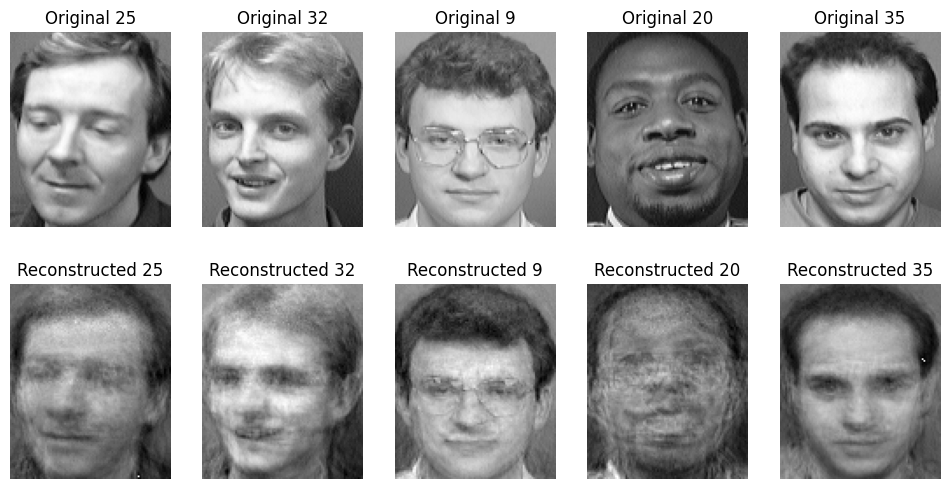

In [9]:
num_images = 5
selected_indices = np.random.choice(test_images.shape[0], num_images, replace=False)

#Displaying the original and reconstructed images
plt.figure(figsize=(12, 6))
for i, index in enumerate(selected_indices):
    #Original image
    plt.subplot(2, num_images, i+1)
    plt.imshow(test_images[index].reshape(112,92), cmap='gray')
    plt.title(f'Original {test_labels[index]+1}')
    plt.axis('off')
    
    #Reconstructed image
    reconstructed_image = imageReconstruction(test_images[index], eigen_faces, mean_face)
    plt.subplot(2, num_images, i+num_images+1)
    plt.imshow(reconstructed_image, cmap='gray')
    plt.title(f'Reconstructed {test_labels[index]+1}')
    plt.axis('off')
    
plt.show()

#### Visualisation
Visualise the results for different number of principal components(pc = 5,10,100, 1000, all).

**Note:** Ensure that the images are labelled appropriately.

/tmp/ipykernel_15358/2610622164.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  reconstructed_image = reconstructed_image.astype(np.uint8)


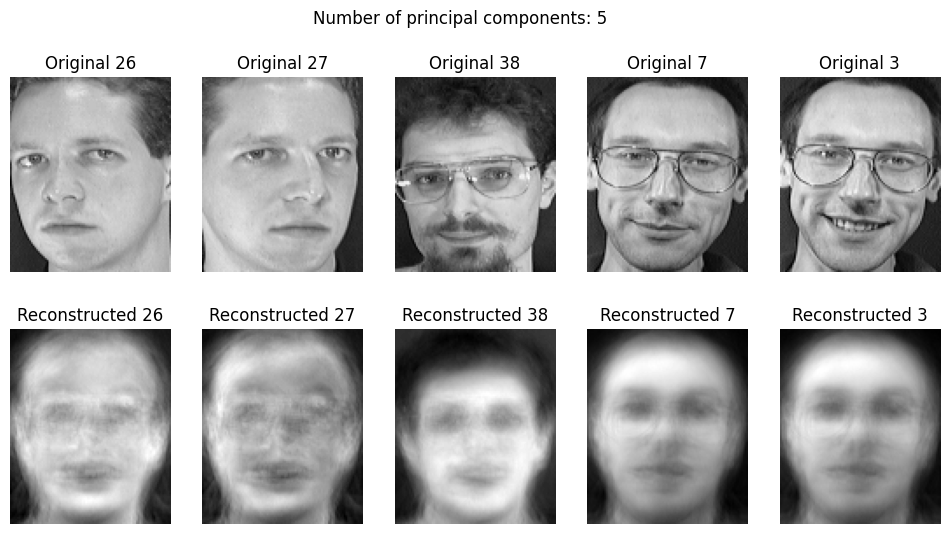

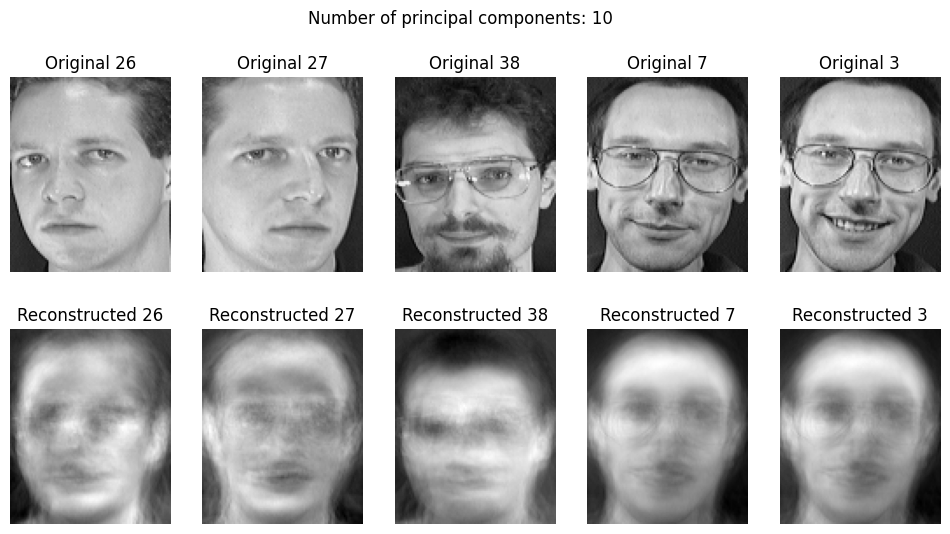

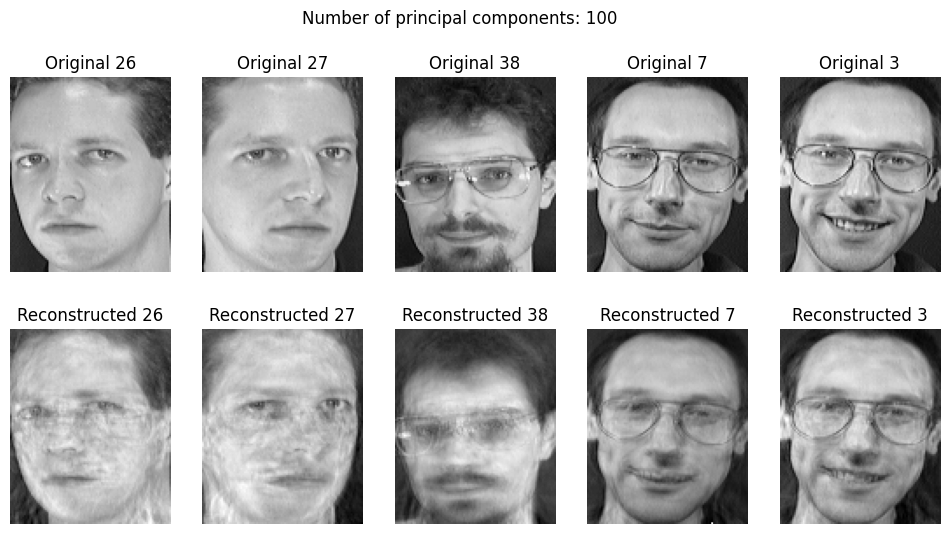

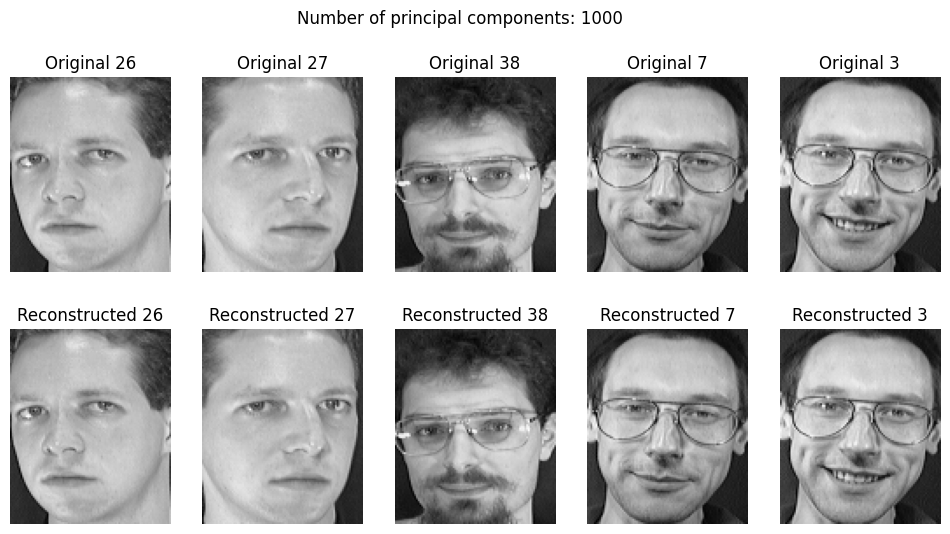

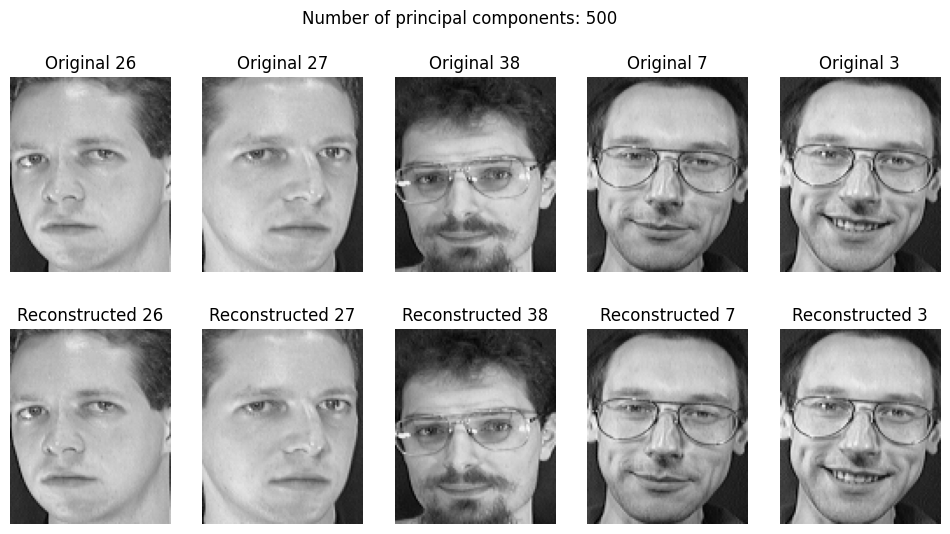

In [12]:
num_components_list = [5, 10, 100, 1000, eigen_faces.shape[1]] # include all components
num_images = 5
selected_indices = np.random.choice(test_images.shape[0], num_images, replace=False)

#Displaying the original and reconstructed images for different number of principal components
for num_components in num_components_list:
    eigen_faces, mean_face = principalComponentAnalysis(images, num_components)
    plt.figure(figsize=(12, 6))
    for i, index in enumerate(selected_indices):
        plt.subplot(2, num_images, i+1)
        plt.imshow(images[index].reshape(112,92), cmap='gray')
        plt.title(f'Original {test_labels[index]+1}')
        plt.axis('off')
        
        reconstructed_image = imageReconstruction(images[index], eigen_faces, mean_face)
        plt.subplot(2, num_images, i+num_images+1)
        plt.imshow(reconstructed_image, cmap='gray')
        plt.title(f'Reconstructed {test_labels[index]+1}')
        plt.axis('off')
        
    plt.suptitle(f'Number of principal components: {num_components}')
    plt.show()


#### Implement face recognition module based on the norm
Explain your steps with comments and write a brief explanation of the method.

*   Test the module and report accuracies based on the number of components taken for a range of value and plot them. 
*   Also plot the mean square error vs the number of eigenvectors taken and report your observations. 
*   For further empirical analysis, plot the semi-log variant of the error plot obtained above.

In [13]:
"""
Implement pca in the following function by taking the following arguements:
1. Test image
2. Eigenvectors
3. Mean Eigen Face
4. Training Set(X_train,y_train)
The function must return the following:
1. image with smallest error
2. error value
3. prediction class
"""
def model(test_image, eigen_faces, mean_face, X_train, y_train):
  test_image = test_image - mean_face
  weights = np.dot(test_image, eigen_faces)
  #calculating the weights of the training images
  X_train = X_train - mean_face
  weights_train = np.dot(X_train, eigen_faces)
  #calculating the error between the test image and the training images
  error = np.linalg.norm(weights - weights_train, axis=1)
  #finding the index of the image with the smallest error
  index = np.argmin(error)
  return X_train[index], error[index], y_train[index]

Accuracy with 5 components: 0.03
Accuracy with 10 components: 0.05
Accuracy with 100 components: 0.05
Accuracy with 1000 components: 0.05
Accuracy with 500 components: 0.05


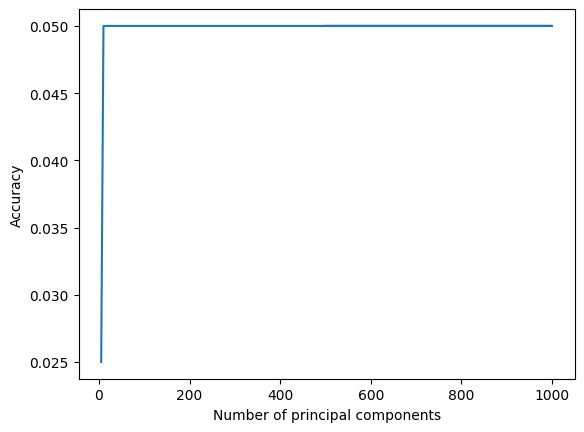

In [14]:
"""
Iterate through all the images in the test data and 
test the accurate by taking different number of components
"""
accuracies = []
for num_components in num_components_list:
    eigen_faces, mean_face = principalComponentAnalysis(images, num_components)
    correct = 0
    for i in range(test_images.shape[0]):
        reconstructed_image, error, prediction = model(test_images[i], eigen_faces, mean_face, images, labels)
        if prediction == test_labels[i]:
            correct += 1
    accuracy = correct / test_images.shape[0]
    accuracies.append(accuracy)
    print(f'Accuracy with {num_components} components: {accuracy:.2f}')

plt.plot(num_components_list, accuracies)
plt.xlabel('Number of principal components')
plt.ylabel('Accuracy')
plt.show()

/tmp/ipykernel_15358/2610622164.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  reconstructed_image = reconstructed_image.astype(np.uint8)


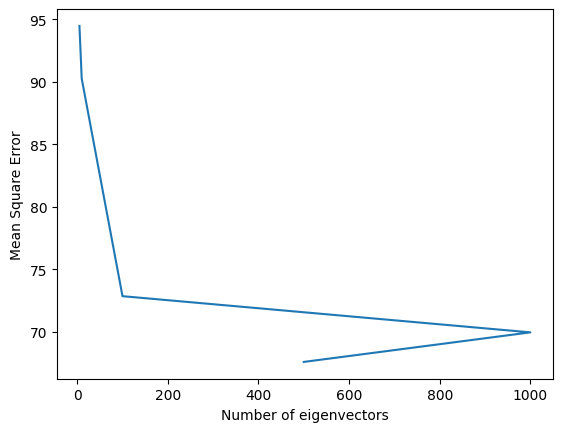

In [17]:
# Plot Number of eigenvectors vs Mean Square Error
mse_list = []
for num_components in num_components_list:
    eigen_faces, mean_face = principalComponentAnalysis(images, num_components)
    total_error = 0
    for i in range(test_images.shape[0]):
        reconstructed_image = imageReconstruction(test_images[i], eigen_faces, mean_face)
        error = np.mean((test_images[i]-reconstructed_image.reshape(test_images[i].shape))**2)
        total_error += error
    mse = total_error/test_images.shape[0]
    mse_list.append(mse)
plt.plot(num_components_list, mse_list)
plt.xlabel('Number of eigenvectors')
plt.ylabel('Mean Square Error')
plt.show()

/tmp/ipykernel_15358/2610622164.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  reconstructed_image = reconstructed_image.astype(np.uint8)


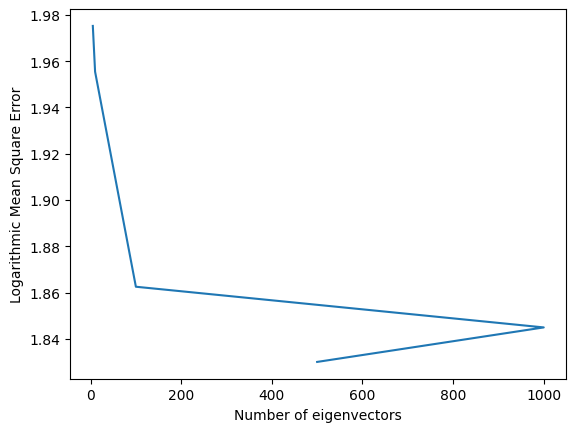

In [18]:
# Plot Number of eigenvectors vs Logarithmic Mean Square Error
log_mse_list = []
for num_components in num_components_list:
    eigen_faces, mean_face = principalComponentAnalysis(images, num_components)
    total_error = 0
    for i in range(test_images.shape[0]):
        reconstructed_image = imageReconstruction(test_images[i], eigen_faces, mean_face)
        error = np.mean((test_images[i]-reconstructed_image.reshape(test_images[i].shape))**2)
        total_error += error
    mse = total_error/test_images.shape[0]
    log_mse = np.log10(mse)
    log_mse_list.append(log_mse)
plt.plot(num_components_list, log_mse_list)
plt.xlabel('Number of eigenvectors')
plt.ylabel('Logarithmic Mean Square Error')
plt.show()

Summarise your observations on the plots and accuracies

**Answer:** We observe that the MSE and LMSE decreases as the Number Of Eigenvectors increases. 
We also observe that as the number of components increases, the accuracy increases as well but then it becomes stagnant. 

State the advantages and limitations of using PCA in general. Also state its limitations in context of face recognition

**Answer:**
The benefits of utilising PCA generally are as follows: 
1. Cutting down on the number of features or variables in a dataset while maintaining the majority of the original data is possible with PCA. This can decrease overfitting and increase computational efficiency.
2. PCA can be used to show high-dimensional data in a lower-dimensional space, which makes visualisation easier to understand and can aid in recognising underlying patterns and correlations.
3. Feature extraction: PCA can be used to locate a dataset's key features, which can be used to create more precise and effective predictive models.
4. Noise reduction: By removing noise and redundant data from the data, PCA can increase the analysis's precision.

Limitations:
1. Interpretability: The transformed features in PCA are linear combinations of the initial features, making it difficult to understand them in the context of the raw data.
2. Information loss: PCA may lead to information loss since the transformed features might not fully reflect the variability of the original data.
3. Scaling dependence: PCA is sensitive to data scaling, therefore standardising the variables is frequently required to obtain meaningful findings.

PCA has a variety of limitations when it comes to facial recognition:
1. Variability in position and illumination are not taken into consideration by PCA, which can have a substantial impact on how the face appears.
2. Lack of discrimination: PCA could not be able to tell identical twins apart from one other when their faces are quite similar to one another.
3. High storage needs: It might be difficult to scale up to real-world applications since storing and manipulating the PCA coefficients for huge datasets can be computationally and memory-intensive.
4. Limited applicability to non-linear variations: PCA makes the assumption that data variations are linear, which may not be the case for more complicated variations, including those that are caused by emotions or facial expressions.